In [1]:
from IPython.display import clear_output
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\JYOTIKA\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [3]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import optuna


C:\Users\JYOTIKA\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\JYOTIKA\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\JYOTIKA\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [4]:
data = pd.read_csv(r'C:\Users\JYOTIKA\Desktop\thesis\heart1.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.loc[data["trestbps"] < 100, "trestbps"] = 100
data.loc[data["trestbps"] > 170, "trestbps"] = 170

data.loc[data["chol"] < 100, "chol"] = 100
data.loc[data["chol"] > 320, "chol"] = 320

data.loc[data["thalach"] < 60, "thalachthalach"] = 60
data.loc[data["thalach"] > 202, "thalachthalach"] = 202

data.loc[data["oldpeak"] < 0, "oldpeak"] = 0
data.loc[data["oldpeak"] > 2.5, "oldpeak"] = 2.5

In [6]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,thalachthalach
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0,NaN
1,67,1,4,160,286,0,2,108,1,1.5,2,3,2,1,NaN
2,67,1,4,120,229,0,2,129,1,2.5,2,2,3,0,NaN
3,37,1,3,130,250,0,0,187,0,2.5,3,0,2,0,NaN
4,41,0,2,130,204,0,2,172,0,1.4,1,0,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,1,0,NaN
299,43,0,4,132,320,1,2,136,1,2.5,2,0,3,1,NaN
300,65,1,4,135,254,0,2,127,0,2.5,2,1,3,1,NaN
301,48,1,4,130,256,1,2,150,1,0.0,1,2,3,1,NaN


In [7]:
data = pd.get_dummies(data, columns=["sex", "cp", "restecg", "exang", "slope"], drop_first=True)

In [8]:
data

,age,trestbps,chol,fbs,thalach,oldpeak,ca,thal,target,thalachthalach,sex_1,cp_1,cp_2,cp_3,cp_4,restecg_1,restecg_2,exang_1,slope_2,slope_3
0,63,145,233,1,150,2.3,0,1,0,NaN,1,1,0,0,0,0,1,0,0,1
1,67,160,286,0,108,1.5,3,2,1,NaN,1,0,0,0,1,0,1,1,1,0
2,67,120,229,0,129,2.5,2,3,0,NaN,1,0,0,0,1,0,1,1,1,0
3,37,130,250,0,187,2.5,0,2,0,NaN,1,0,0,1,0,0,0,0,0,1
4,41,130,204,0,172,1.4,0,2,0,NaN,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,118,186,0,190,0.0,0,1,0,NaN,1,1,0,0,0,0,1,0,1,0
299,43,132,320,1,136,2.5,0,3,1,NaN,0,0,0,0,1,0,1,1,1,0
300,65,135,254,0,127,2.5,1,3,1,NaN,1,0,0,0,1,0,1,0,1,0
301,48,130,256,1,150,0.0,2,3,1,NaN,1,0,0,0,1,0,1,1,0,0


In [9]:
x = data.drop("target", axis=1)
y = data["target"]
#30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)

In [10]:
model = LGBMClassifier().fit(x_train, y_train)
train_acc = model.score(x_train, y_train)
    
y_pred = model.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)

In [11]:
test_acc

0.7912087912087912

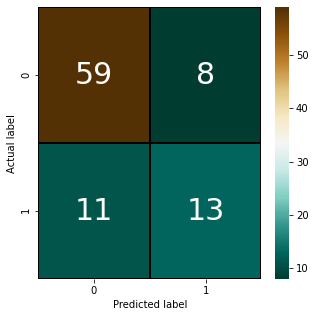

In [12]:


from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=1,cmap='BrBG_r',linecolor="black",fmt=".0f",ax=ax,annot_kws={"size": 30})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [13]:
TP=CM[0][0]
TN=CM[1][1]
FN=CM[1][0]
FP=CM[0][1]
print('Testing Accuracy for LightGBM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for LightGBM:',(TP/(TP+FN)))
print('Testing Specificity for LightGBM:',(TN/(TN+FP)))
print('Testing Precision for LightGBM:',(TP/(TP+FP)))

Testing Accuracy for LightGBM: 0.7912087912087912
Testing Sensitivity for LightGBM: 0.8428571428571429
Testing Specificity for LightGBM: 0.6190476190476191
Testing Precision for LightGBM: 0.8805970149253731
